In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
#suppress warnings
import warnings
warnings.filterwarnings('ignore')

mnist = load_digits()

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.3, random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression

model_base = LogisticRegression(random_state=42)
model_base.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Mejor hiperparámetro C: ", grid_search.best_params_['C'])

Mejor hiperparámetro C:  0.01


In [9]:
model_final = LogisticRegression(C=grid_search.best_params_['C'], random_state=42)
model_final.fit(X_train, y_train)

print("Precisión del modelo base: ", model_base.score(X_test, y_test))
print("Precisión del modelo final: ", model_final.score(X_test, y_test))


Precisión del modelo base:  0.9648148148148148
Precisión del modelo final:  0.9703703703703703


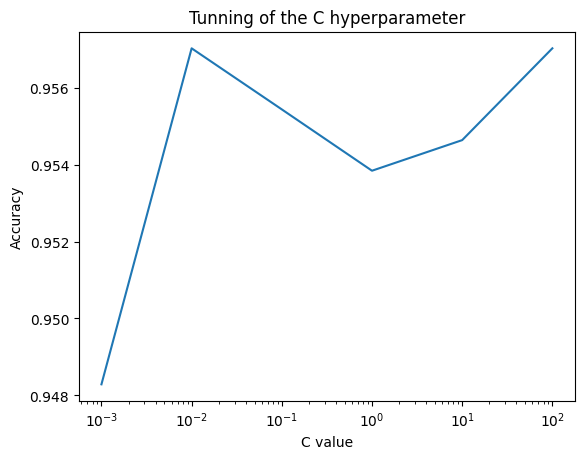

In [10]:
import matplotlib.pyplot as plt

c_values = [0.001, 0.01, 0.1, 1, 10, 100]
accuracies = grid_search.cv_results_['mean_test_score']

plt.plot(c_values, accuracies)
plt.xscale('log')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.title('Tunning of the C hyperparameter')
plt.show()
